In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


### General purpose

The purpose of the following project is to analyze the weather in Quebec and Montreal.  
More specifically to compare 2015-2019 weather readings with that of weather data from 1940 to 2014

### Project Scope
  
- To clean and format weather data (source: https://www.kaggle.com/aturner374/eighty-years-of-canadian-climate-data)  
    such that the hottest and coldest day of each year from 1940 to 2014 are isolated, and subsequently compared with recent years  
    (last 5 years from dataframe 2015-2019)
   
    the comparasion will be as such: If there are any days from 2015-2019 where the temperature is either higher or lower than the
    highest recorded temperature from 1940-2014 then said temperature will be deemed as "record breaking"

- To plot our data, the highest and lowest temperatures of each day from 1940-2014 will be plotted through a line graph wheras the record breaking values will be plotted using a scatter plot. This will be done to emphasize how many instances of record breaking temperature days  we had from 2015 to 2019.


In [3]:
df = pd.read_csv('Canadian_climate_history.csv')

# Slicing for data in Quebec and Montreal

df_Quebec = df.copy()[['LOCAL_DATE','MEAN_TEMPERATURE_MONTREAL', 'MEAN_TEMPERATURE_QUEBEC']]

# Adding a collumn for pandas DateTimeIndex for later grouping

tdt = pd.DatetimeIndex(df_Quebec['LOCAL_DATE'])
df_Quebec['dti'] = tdt.copy()
df_Quebec = df_Quebec[['dti',
                       'LOCAL_DATE',
                       'MEAN_TEMPERATURE_MONTREAL',
                       'MEAN_TEMPERATURE_QUEBEC']]

df_Quebec

,dti,LOCAL_DATE,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_QUEBEC
0,1940-01-01,01-Jan-1940 00:00:00,NaN,NaN
1,1940-01-02,02-Jan-1940 00:00:00,NaN,NaN
2,1940-01-03,03-Jan-1940 00:00:00,NaN,NaN
3,1940-01-04,04-Jan-1940 00:00:00,NaN,NaN
4,1940-01-05,05-Jan-1940 00:00:00,NaN,NaN
...,...,...,...,...
29216,2019-12-28,28-Dec-2019 00:00:00,1.3,-0.5
29217,2019-12-29,29-Dec-2019 00:00:00,-0.9,-4.9
29218,2019-12-30,30-Dec-2019 00:00:00,-2.3,-5.7
29219,2019-12-31,31-Dec-2019 00:00:00,-0.2,-3.5


In [4]:
# To have consistent days, the below is to remoeve all leap days from our data set

# using regex + boolean masking to remove all leap days
booleanMask_LD =(df_Quebec['LOCAL_DATE']
              .str
              .startswith('29-Feb-'))


df_Quebec = df_Quebec[~booleanMask_LD]
df_Quebec

,dti,LOCAL_DATE,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_QUEBEC
0,1940-01-01,01-Jan-1940 00:00:00,NaN,NaN
1,1940-01-02,02-Jan-1940 00:00:00,NaN,NaN
2,1940-01-03,03-Jan-1940 00:00:00,NaN,NaN
3,1940-01-04,04-Jan-1940 00:00:00,NaN,NaN
4,1940-01-05,05-Jan-1940 00:00:00,NaN,NaN
...,...,...,...,...
29216,2019-12-28,28-Dec-2019 00:00:00,1.3,-0.5
29217,2019-12-29,29-Dec-2019 00:00:00,-0.9,-4.9
29218,2019-12-30,30-Dec-2019 00:00:00,-2.3,-5.7
29219,2019-12-31,31-Dec-2019 00:00:00,-0.2,-3.5


In [5]:
# Creating a new dataframe which hold data from the last 5 years of our dataframe (2015 - 2019)

# using regex + boolean masking to to filter for data from 2015 to 2019

df_Quebec_2015_19 = df_Quebec
filterFor2015_19 = (df_Quebec_2015_19['LOCAL_DATE']
          .str
          .contains(r'\d\d-[A-Za-z]+-201[56789]\s'))


df_Quebec_2015_19 = df_Quebec_2015_19[filterFor2015_19]
df_Quebec_2015_19




,dti,LOCAL_DATE,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_QUEBEC
27394,2015-01-01,01-Jan-2015 00:00:00,-5.2,-8.5
27395,2015-01-02,02-Jan-2015 00:00:00,-9.7,-11.6
27396,2015-01-03,03-Jan-2015 00:00:00,-12.6,-20.5
27397,2015-01-04,04-Jan-2015 00:00:00,-2.1,-7.0
27398,2015-01-05,05-Jan-2015 00:00:00,-11.5,-14.0
...,...,...,...,...
29215,2019-12-27,27-Dec-2019 00:00:00,-0.5,-2.7
29216,2019-12-28,28-Dec-2019 00:00:00,1.3,-0.5
29217,2019-12-29,29-Dec-2019 00:00:00,-0.9,-4.9
29218,2019-12-30,30-Dec-2019 00:00:00,-2.3,-5.7


In [6]:
# using the same method as the above to isolate all data from 1940 to 2014

df_Quebec_to_2014 = df_Quebec

filterTo2014 = (~df_Quebec_to_2014['LOCAL_DATE']
          .str
          .contains(r'\d\d-[A-Za-z]+-201[56789]\s'))

df_Quebec_to_2014 = df_Quebec_to_2014[filterTo2014]

# The data of year 2020 is incomplete and will therfore be removed using the same method as above
mask2020 = (~df_Quebec_to_2014['LOCAL_DATE']
          .str
          .contains(r'\d\d-[A-Za-z]+-202\d\s'))

df_Quebec_to_2014 = df_Quebec_to_2014[mask2020]
df_Quebec_to_2014

,dti,LOCAL_DATE,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_QUEBEC
0,1940-01-01,01-Jan-1940 00:00:00,NaN,NaN
1,1940-01-02,02-Jan-1940 00:00:00,NaN,NaN
2,1940-01-03,03-Jan-1940 00:00:00,NaN,NaN
3,1940-01-04,04-Jan-1940 00:00:00,NaN,NaN
4,1940-01-05,05-Jan-1940 00:00:00,NaN,NaN
...,...,...,...,...
27389,2014-12-27,27-Dec-2014 00:00:00,4.5,1.1
27390,2014-12-28,28-Dec-2014 00:00:00,3.2,-0.6
27391,2014-12-29,29-Dec-2014 00:00:00,-5.9,-9.4
27392,2014-12-30,30-Dec-2014 00:00:00,-12.7,-17.4


In [7]:
# Using groupby method in conjunction with the aggregate method to isolate the largest and lowest temperature values
# i.e. the below finds the hottest and coldest temperature value of each day over the designated span

# maximum values of weather data from 1940 to 2014 (hottest days)

dfQC_to2014_max = (df_Quebec_to_2014
                   .groupby([df_Quebec_to_2014.dti.dt.month,
                             df_Quebec_to_2014.dti.dt.day])
                   .agg(np.max))

# minimum  values of weather data from 1940 to 2014 (coldest days)

dfQC_to2014_min = (df_Quebec_to_2014
                   .groupby([df_Quebec_to_2014.dti.dt.month,
                             df_Quebec_to_2014.dti.dt.day])
                   .agg(np.min))

# maximum values of weather data from 2015 - 2019 (hottest days)
dfQC_2019_max = (df_Quebec_2015_19 
                 .groupby([df_Quebec_2015_19 .dti.dt.month,
                           df_Quebec_2015_19 .dti.dt.day])
                 .agg(np.max))

# minimum values of weather data from 2019 (coldest days)
dfQC_2019_min = (df_Quebec_2015_19 
                 .groupby([df_Quebec_2015_19 .dti.dt.month,
                           df_Quebec_2015_19 .dti.dt.day])
                 .agg(np.min))


# reformatting columns for ease of reading:


dfQC_to2014_max.rename(columns = {'MEAN_TEMPERATURE_MONTREAL':'To 2014 Maximum MTL', 
                                  'MEAN_TEMPERATURE_QUEBEC':'To 2014 Maximum QC'}, 
                       inplace = True)

dfQC_to2014_min.rename(columns = {'MEAN_TEMPERATURE_MONTREAL':'To 2014 Minimum MTL', 
                                  'MEAN_TEMPERATURE_QUEBEC':'To 2014 Minimum QC'}, 
                       inplace = True)

dfQC_2019_max.rename(columns = {'MEAN_TEMPERATURE_MONTREAL':'2019 Maximum MTL', 
                                  'MEAN_TEMPERATURE_QUEBEC':'2019 Maximum QC'}, 
                       inplace = True)

dfQC_2019_min.rename(columns = {'MEAN_TEMPERATURE_MONTREAL':'2019 Minimum MTL', 
                                  'MEAN_TEMPERATURE_QUEBEC':'2019 Minimum QC'}, 
                       inplace = True)


In [8]:
# Finding record highs and lows of MTL:

lows_MTL = np.array(dfQC_to2014_min['To 2014 Minimum MTL'])
highs_MTL = np.array(dfQC_to2014_max['To 2014 Maximum MTL'])

lows_MTL_2019 = np.array(dfQC_2019_min['2019 Minimum MTL'])
highs_MTL_2019 = np.array(dfQC_2019_max['2019 Maximum MTL'])

# Determining record breaking highs:
recordBreakingHighs = []
maxAxis = []

recordBreakingLows = []
minAxis = []

for i in range(len(highs_MTL)):
    if highs_MTL[i] < highs_MTL_2019[i]:
        recordBreakingHighs.append(highs_MTL_2019[i])
        maxAxis.append(i)
        
    else:
        continue
        
        
for i in range(len(lows_MTL)):
    if lows_MTL[i] > lows_MTL_2019[i]:
        recordBreakingLows.append(lows_MTL_2019[i])
        minAxis.append(i)
        
    else:
        continue
        

In [9]:
# # Finding record highs and lows of QC:

lows_QC = np.array(dfQC_to2014_min['To 2014 Minimum QC'])
highs_QC = np.array(dfQC_to2014_max['To 2014 Maximum QC'])

lows_QC_2019 = np.array(dfQC_2019_min['2019 Minimum QC'])
highs_QC_2019 = np.array(dfQC_2019_max['2019 Maximum QC'])

# Determining record breaking highs in 2019:
recordBreakingHighs_QC = []
maxAxis_QC = []

recordBreakingLows_QC = []
minAxis_QC = []

for i in range(len(highs_QC)):
    if highs_QC[i] < highs_QC_2019[i]:
        recordBreakingHighs_QC.append(highs_QC_2019[i])
        maxAxis_QC.append(i)
        
    else:
        continue
        
        
for i in range(len(lows_QC)):
    if lows_QC[i] > lows_QC_2019[i]:
        recordBreakingLows_QC.append(lows_QC_2019[i])
        minAxis_QC.append(i)
        
    else:
        continue
        

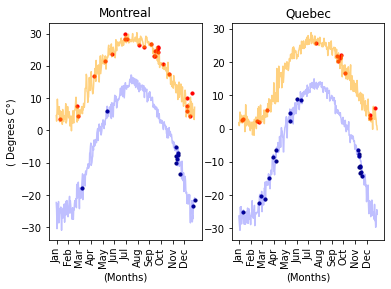

In [17]:
# Graphing:

plt.figure()

# MONTREAL

plt.subplot(121)

# graphing lows in blue (line):
plt.plot(lows_MTL, 
         c= 'blue', 
         alpha = 0.25, 
         label = 'Minimum Temperature (1940 - 2014)')

# graphing highs in orange (line):
plt.plot(highs_MTL, 
         c= 'orange', 
         alpha = 0.5, 
         label = 'Maximum Temperature (1940 - 2014)')

# graphing record breaking lows in 2015 in navy blue (scatter)
plt.scatter(minAxis, recordBreakingLows, s = 10, c = 'navy', label = 'Record Low (2015-2019)')

# graphing record breaking highs in 2015 in red (scatter)
plt.scatter(maxAxis, recordBreakingHighs, s = 10, c = 'red', label = 'Record High (2015-2019)')


month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)
plt.xticks(rotation=90)

plt.xlabel('(Months)')
plt.ylabel('( Degrees C°)')
plt.title('Montreal')


# QUEBEC:

plt.subplot(122)


# graphing lows in blue (line):
plt.plot(lows_QC, 
         c= 'blue', 
         alpha = 0.25, 
         label = 'Minimum Temperature (1940 - 2014)')

# graphing highs in orange (line):
plt.plot(highs_QC, 
         c= 'orange', 
         alpha = 0.5, 
         label = 'Maximum Temperature (1940 - 2014)')

# graphing record breaking lows in 2015 in navy blue (scatter)
plt.scatter(minAxis_QC, recordBreakingLows_QC, s = 10, c = 'navy', label = 'Record Low (2015-2019)')

# graphing record breaking highs in 2015 in red (scatter)
plt.scatter(maxAxis_QC, recordBreakingHighs_QC, s = 10, c = 'red', label = 'Record High (2015-2019)')


month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)
plt.xticks(rotation=90)
plt.xlabel('(Months)')
plt.title('Quebec')



plt.show()

